In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Parameters

In [3]:
name = "GoogleNet"

## MatLab Data Loading

In [5]:
path = "RCNN/" + name + "/MathLab_Data"

acc_data = np.genfromtxt(path + "/training/" + name  + "_acc.csv", delimiter=",")[1:]
loss_data = np.genfromtxt(path + "/training/" + name  + "_loss.csv", delimiter=",")[1:]

## Graphing

### Accuracy

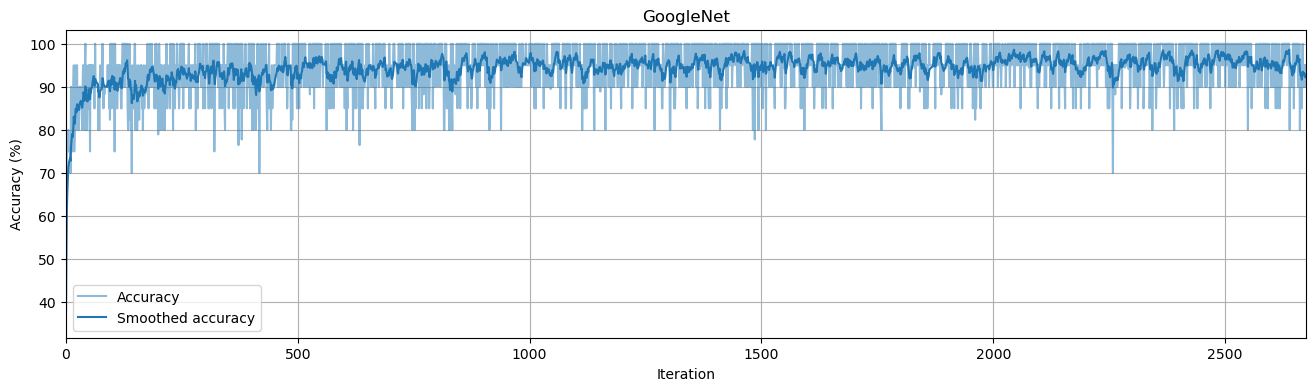

In [25]:
color = "#1f77b4"
labels = ["Accuracy", "Smoothed accuracy"]

iterations = acc_data.shape[0]
train_y = acc_data
train_x = np.linspace(0, iterations, iterations) 

#Creating smoothed data
dataframe = pd.DataFrame(train_y)
smoothed_data = dataframe.ewm(com=5).mean()

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(train_x, train_y,alpha=0.5, color=color)
ax.plot(train_x, smoothed_data, color=color)

ax.grid(True, which="both")
ax.legend(labels)

plt.ylabel(labels[0] + " (%)")
plt.xlabel("Iteration")

plt.xlim(0, iterations)

plt.title(name)
plt.savefig("RCNN/" + name + "/" + name + "_TrainGraphAcc.svg")

### Loss

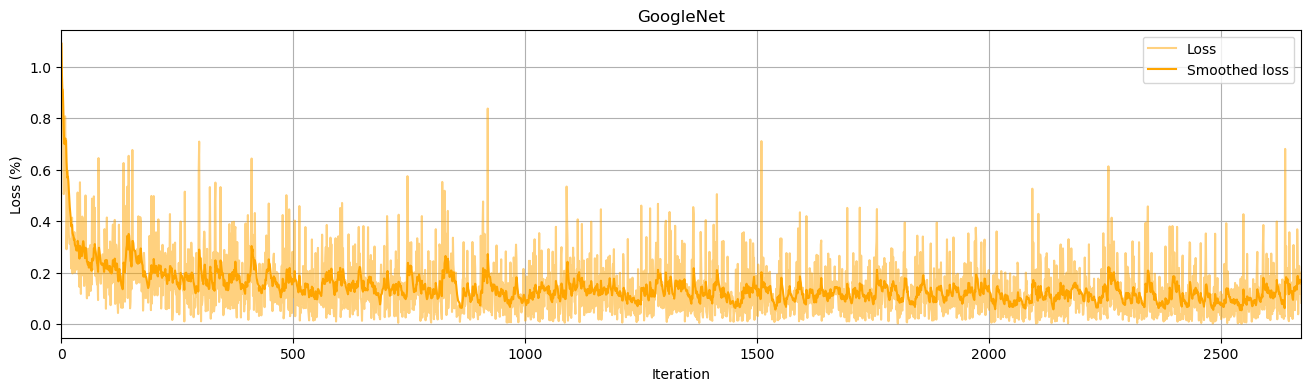

In [27]:
color = "#FFA500"
labels = ["Loss", "Smoothed loss"]

iterations = loss_data.shape[0]
train_y = loss_data
train_x = np.linspace(0, iterations, iterations) 

#Creating smoothed data
dataframe = pd.DataFrame(train_y)
smoothed_data = dataframe.ewm(com=5).mean()

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(train_x, train_y,alpha=0.5, color=color)
ax.plot(train_x, smoothed_data, color=color)

ax.grid(True, which="both")
ax.legend(labels)

plt.ylabel(labels[0] + " (%)")
plt.xlabel("Iteration")

plt.xlim(0, iterations)

plt.title(name)
plt.savefig("RCNN/" + name + "/" + name + "_TrainGraphLoss.svg")

## Confusion matrix

### Loading data

In [29]:
final_path = "RCNN/" + name + "/MathLab_Data/final_test_results"

y_pred_raw = np.genfromtxt(final_path + "/y_predicted.csv", delimiter=",", dtype="S")[1:]
y_test_raw = np.genfromtxt(final_path + "/y_test.csv", delimiter=",", dtype="S")[1:]

y_pred = np.empty(len(y_pred_raw))
y_test = np.empty(len(y_test_raw))

for i in range(0, len(y_pred_raw)):
    if y_pred_raw[i] == b'Edible':
        y_pred[i] = 0
    else:
        y_pred[i] = 1

    if y_test_raw[i] == b'Edible':
        y_test[i] = 0
    else:
        y_test[i] = 1

### Matrix visualization

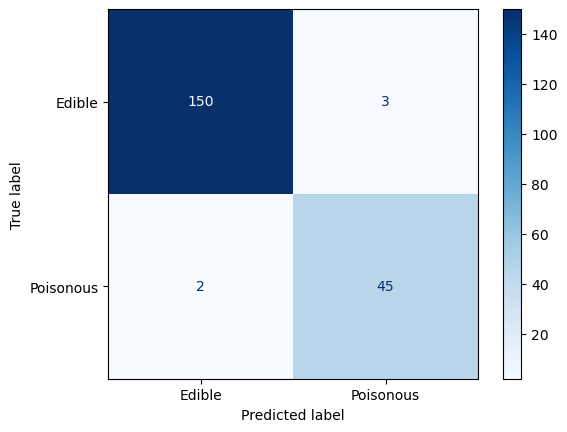

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["Edible", "Poisonous"])
disp.plot(cmap=plt.cm.Blues).figure_.savefig("RCNN/" + name + "/" + name + "_ConfusionMatrix.svg")

## Metrics

In [33]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

accuracy = (tp + tn) / (tp + tn + fn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (precision *  recall) / (precision + recall)
f1 *= 2

print(name + ":")
print("Accuracy  {:0.2f} %".format(accuracy * 100))
print("Precision {:0.2f} %".format(precision * 100))
print("Recall    {:0.2f} %".format(recall * 100))
print("F1        {:0.2f} %".format(f1 * 100))

GoogleNet:
Accuracy  97.50 %
Precision 98.04 %
Recall    98.68 %
F1        98.36 %
